In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [4]:
! mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d laotse/credit-risk-dataset

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 93.2MB/s]


In [6]:
! unzip credit-risk-dataset.zip

Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


# Business Understanding

In [7]:
import pandas as pd
data = pd.read_csv('/content/credit_risk_dataset.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
data.shape

(32581, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


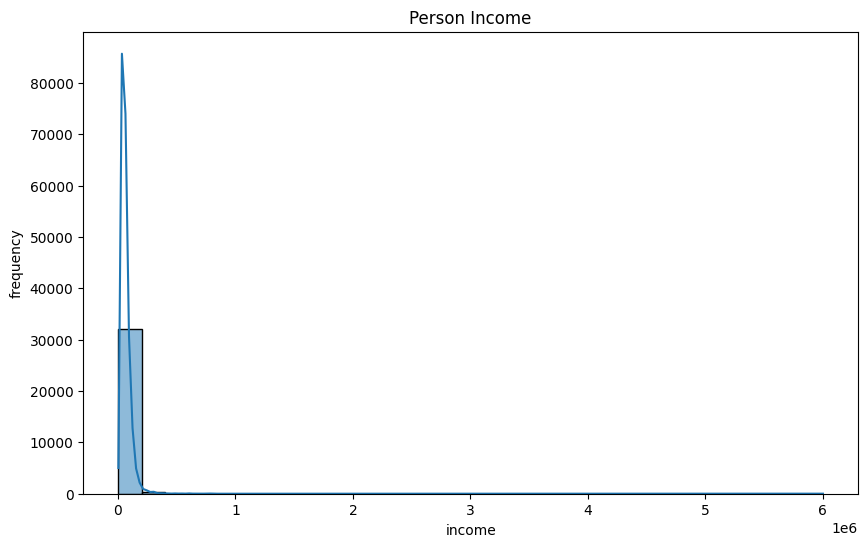

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#person income
plt.figure(figsize=(10,6))
sns.histplot(data['person_income'], bins=30, kde=True)
plt.title('Person Income')
plt.xlabel('income')
plt.ylabel('frequency')
plt.show()

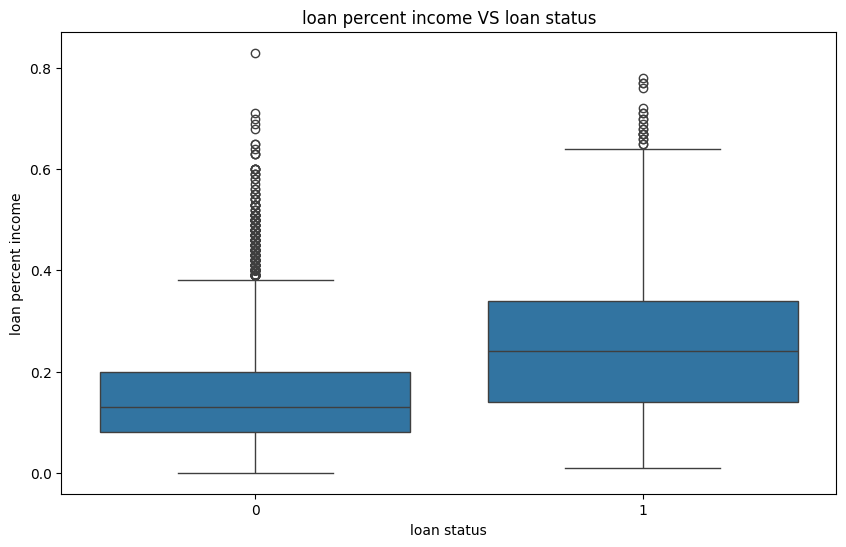

In [12]:
#loan percent vs loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=data)
plt.title('loan percent income VS loan status')
plt.xlabel('loan status')
plt.ylabel('loan percent income')
plt.show()

## Feature

Feature terlatak pada colom Loan_status dikarenakan akan memprediksi credit risk

In [13]:
dfg = data.groupby('loan_status').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


   loan_status  total       %
0            0  25473  78.184
1            1   7108  21.816


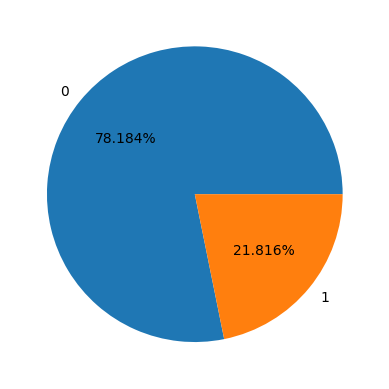

In [14]:
plt.pie(dfg['total'], labels=dfg['loan_status'], autopct='%.3f%%')
plt.show()

berdasarkan tabel diatas persentase **loan_status** dengan gagal bayar sebesar 21.816%. analisis ini dilakukan untuk menurunkan deafault rate <10%



In [15]:
data.groupby('loan_status').agg({'loan_amnt':'sum'}).reset_index()

,loan_status,loan_amnt
0,0,235305925
1,1,77125375


total kerugian perusahaan akibat gagal bayar sebesar $77125375 dikarenakan peminjam tidak mampu bayar

# Data Collection

In [16]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [17]:
data1 = data.copy()

In [18]:
# drop = data1.isnull().sum().sort_values()
# drop = drop[drop == data1.shape[0]]
# drop = list(drop.index)

# print ('dimensi data sebelum drop =', data1.shape)

# data1.drop(columns= drop, inplace=True)
# print('sesudah di drop =', data1.shape)

In [19]:
nums = []
cats = []

for i in data1.columns:
    if data1[i].dtype == 'object':
        cats.append(i)
    else:
        nums.append(i)

print('Jumlah fitur numerik =', len(nums))
print('Fitur numerik =', nums)
print('Jumlah fitur kategorikal =', len(cats))
print('Fitur kategorikal =', cats)


Jumlah fitur numerik = 8
Fitur numerik = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
Jumlah fitur kategorikal = 4
Fitur kategorikal = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [20]:
data1['loan_amnt'][data1['loan_status']==1].sum()

77125375

# Statistical Summary for Categorical Features

In [21]:
data1[cats].describe().T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836




*   `person_home_ownership` : status kepemilikan rumah
*   `loan_intent` : tujuan pinjaman
* `loan_grade` : peringkat pinjaman
* `cb_person_default_on_file` : individu memiliki catatan credit gagal atau tidak sebelumnya.



# Statistical Summary for Numerical Features

In [22]:
data1[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


* `person_age` merupakan usia dari individu yang
melakukan pinjaman.

*   `person income` : pendapatan individu yang mengajukan pinjaman.
*  `person_emp_length` : lama pengalaman kerja

* `loan_amnt` : jumlah punjaman
* `loan_int_rate` : suku bunga pinjaman dari pinjaman yang diberikan.
* `loan_status` : status pinjaman yang diberikan, 1 merupakan gagal bayar dan 0 tidak gagal bayar.
* `loan_percent_income` : persetase pendapatan yang digunakan untuk membayaran pinjaman.
* `cb_person_cred_hist_lengh` : panjang masa kredit dalam bulan.

feature berdasarkan 5C ⁉

1.   Character : `cb_person_default_on_file`
2.   Capacity : `person_income`, `loan_amnt`
3.   Collateral : `home_ownership`
4. Ccapital : `home_ownership`
5. Conditional : `loan_int_rate`, `loan_grade`



# Exploratory Data Analysis

## Statistical summary : Categorical Features

In [23]:
data1[cats].describe().T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [24]:
for i in cats:
  print('------'*10)
  print(i)
  print(data1[i].value_counts())

------------------------------------------------------------
person_home_ownership
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
------------------------------------------------------------
loan_intent
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
------------------------------------------------------------
loan_grade
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
------------------------------------------------------------
cb_person_default_on_file
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


**Observasi**


*   Label `cb_person_default_on_file` diubah kedalam bentuk biner
*   Label `Loan_grade` diubah kedalam bentuk urutan grade

## Statistical Summary : Numerical Features

In [25]:
data1[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


## Univariate Analysis : Categorical Features

In [26]:
#membuat urutan feature grade
temp = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data1 ['loan_grade']= pd.Categorical(data1['loan_grade'], categories=temp, ordered=True)

### Loan grade

In [27]:
dfg = data1.groupby('loan_grade').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


  loan_grade  total       %
0          A  10777  33.078
1          B  10451  32.077
2          C   6458  19.821
3          D   3626  11.129
4          E    964   2.959
5          F    241   0.740
6          G     64   0.196


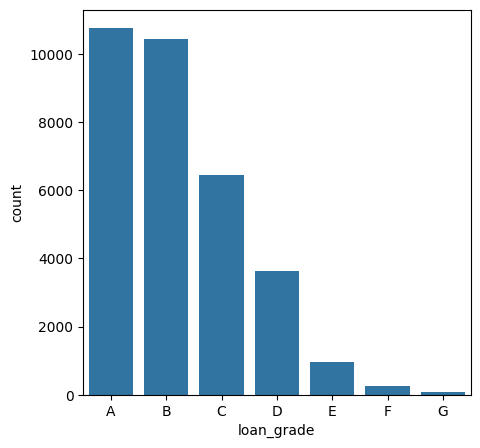

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x=data1['loan_grade'])
plt.show()

feature `loan_grade` didominasi oleh label A dan B

### Loan_Intent


In [29]:
dfg = data1.groupby('loan_intent').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


         loan_intent  total       %
0  DEBTCONSOLIDATION   5212  15.997
1          EDUCATION   6453  19.806
2    HOMEIMPROVEMENT   3605  11.065
3            MEDICAL   6071  18.634
4           PERSONAL   5521  16.945
5            VENTURE   5719  17.553


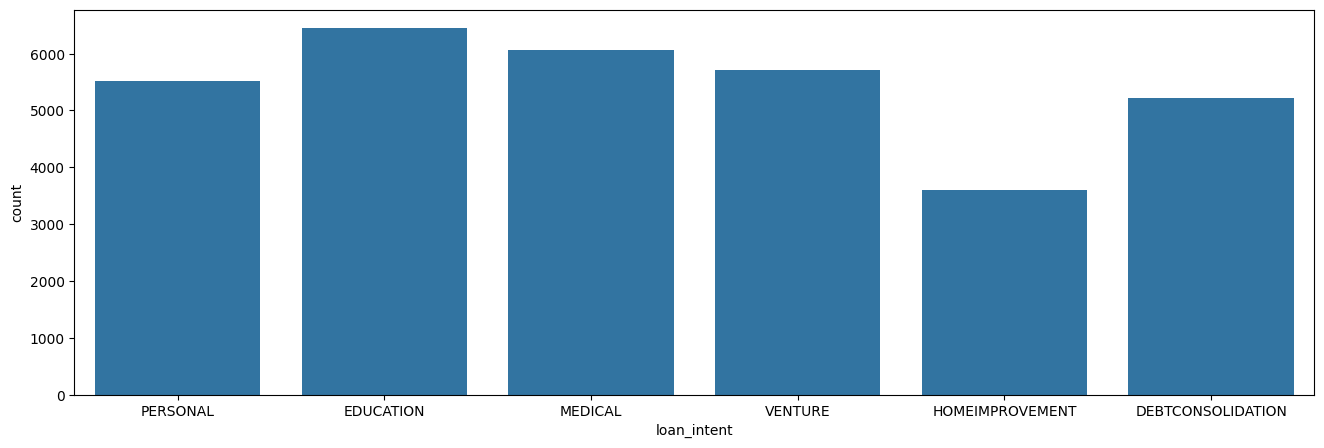

In [30]:
plt.figure(figsize=(16,5))
sns.countplot(x=data1['loan_intent'])
plt.show()

### person_home_ownership

In [31]:
dfg = data1.groupby('person_home_ownership').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


  person_home_ownership  total       %
0              MORTGAGE  13444  41.263
1                 OTHER    107   0.328
2                   OWN   2584   7.931
3                  RENT  16446  50.477


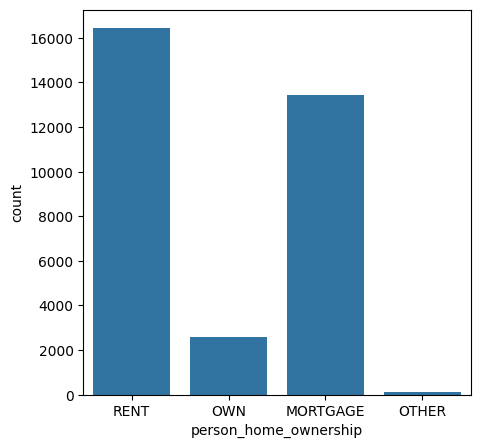

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(x=data1['person_home_ownership'])
plt.show()

### cb_person_default_on_file

In [33]:
dfg = data1.groupby('cb_person_default_on_file').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


  cb_person_default_on_file  total       %
0                         N  26836  82.367
1                         Y   5745  17.633


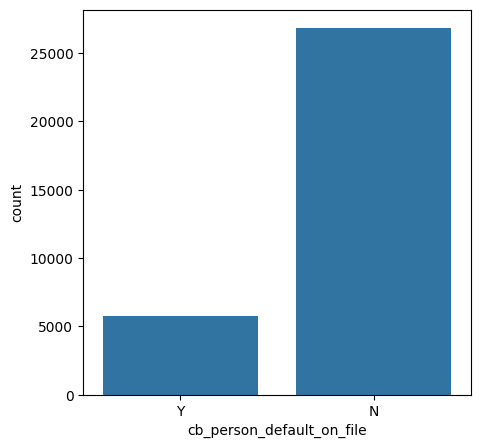

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x=data1['cb_person_default_on_file'])
plt.show()

feature `cb_person_default_on_file` didominasi label N yang berarti sebanyak 82% tidak gagal bayar dan 17% gagal bayar



## Univariate Analysis : Numerical Features

In [35]:
print(nums)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [36]:
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

In [37]:
len(numerical)

8

### Distribution Numerical Features

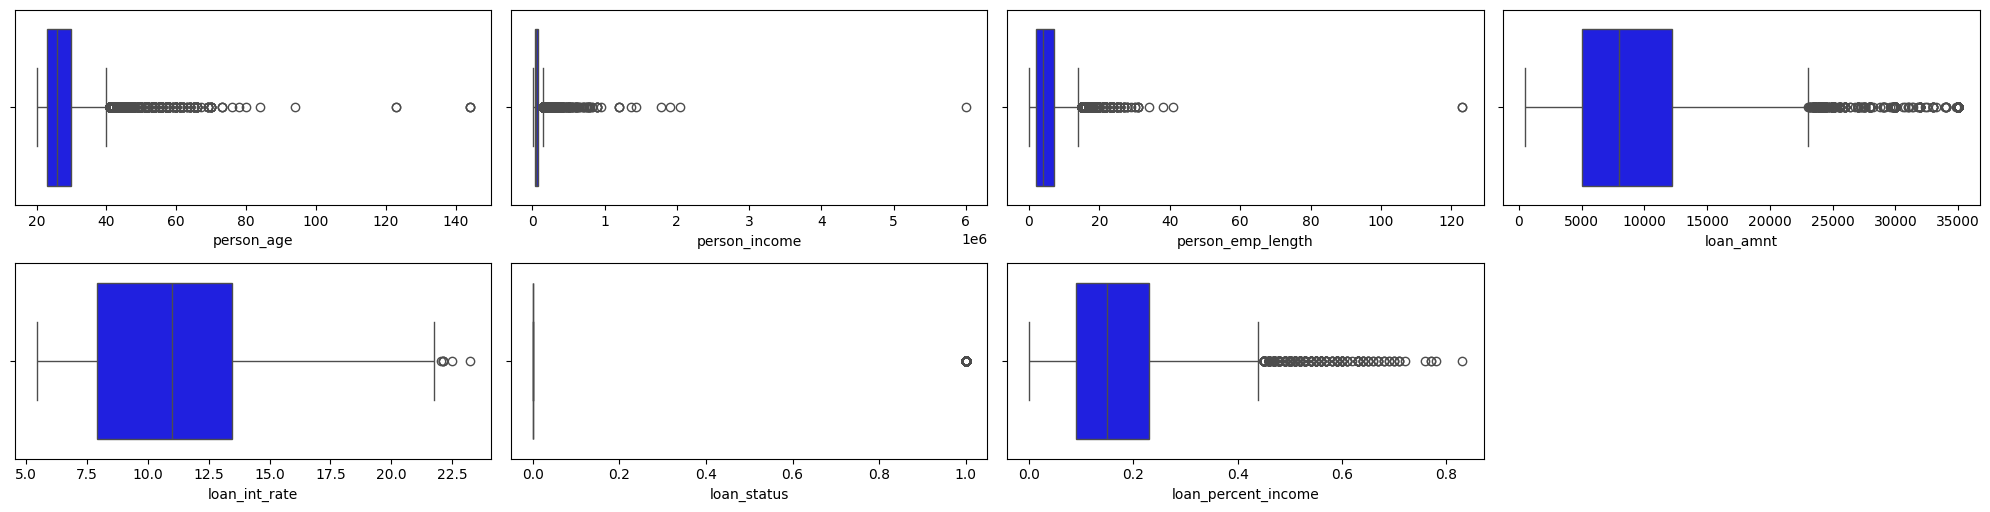

In [38]:
plt.figure(figsize=(20,20))
for i in range(0, len(temp)):
  plt.subplot(8,4,i+1)
  sns.boxplot(x=data1[numerical[i]], color='blue')
  plt.xlabel(numerical[i])
  plt.tight_layout()

## Bivariate Analysis : Categorical Features

In [39]:
print(cats)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [40]:
categorical = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [41]:
len(categorical)

4

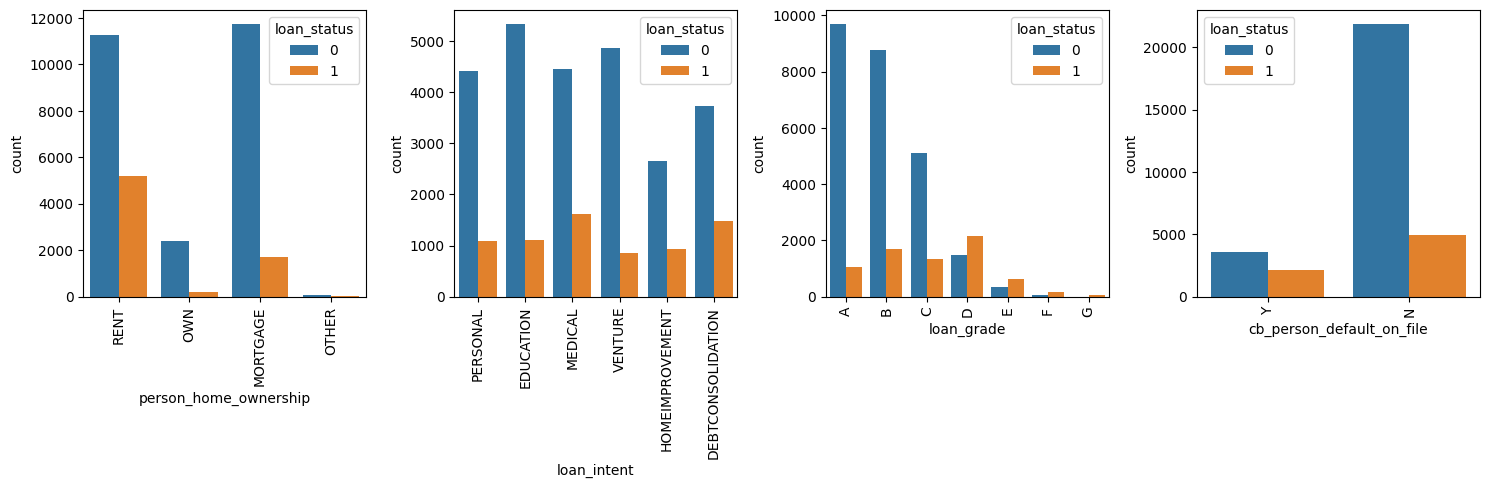

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i in range(0, len(categorical)):
    plt.subplot(2, 4, i+1)
    sns.countplot(data=data1, x=categorical[i], hue='loan_status')
    plt.xlabel(categorical[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


* `person_home_ownership` status gagal bayar paling banyak yaitu RENT
* `loan_inten` status gagal bayar paling banyak untuk medical dan debtconsolidation
* `loan_grade` pada grade D paling banyak gagal bayar.
* `cb_person_default_on_file` orang yang memiliki catatan gagal bayar sebelumnya yang paling banyak gagal bayar

## Bivariate Analysis : Numerical Features

In [53]:
print(numerical)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [44]:
cats = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

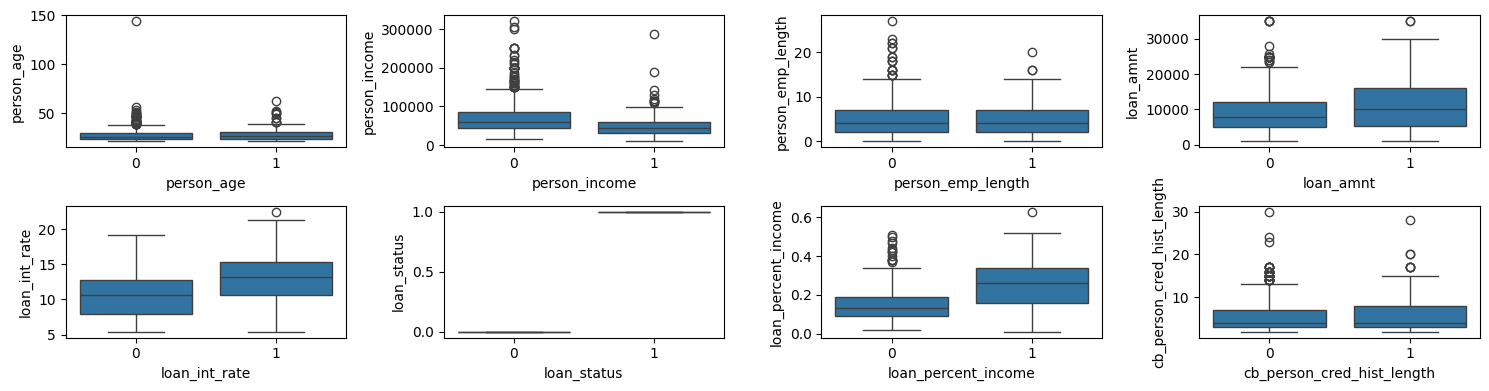

In [46]:
box = data1.sample(1000, random_state=1)
plt.figure(figsize=(15,15))
for i in range(0, len(cats)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(y=box[cats[i]], x=data1['loan_status'])
    plt.xlabel(cats[i])
    plt.tight_layout()

## Mulrivariate Analysis

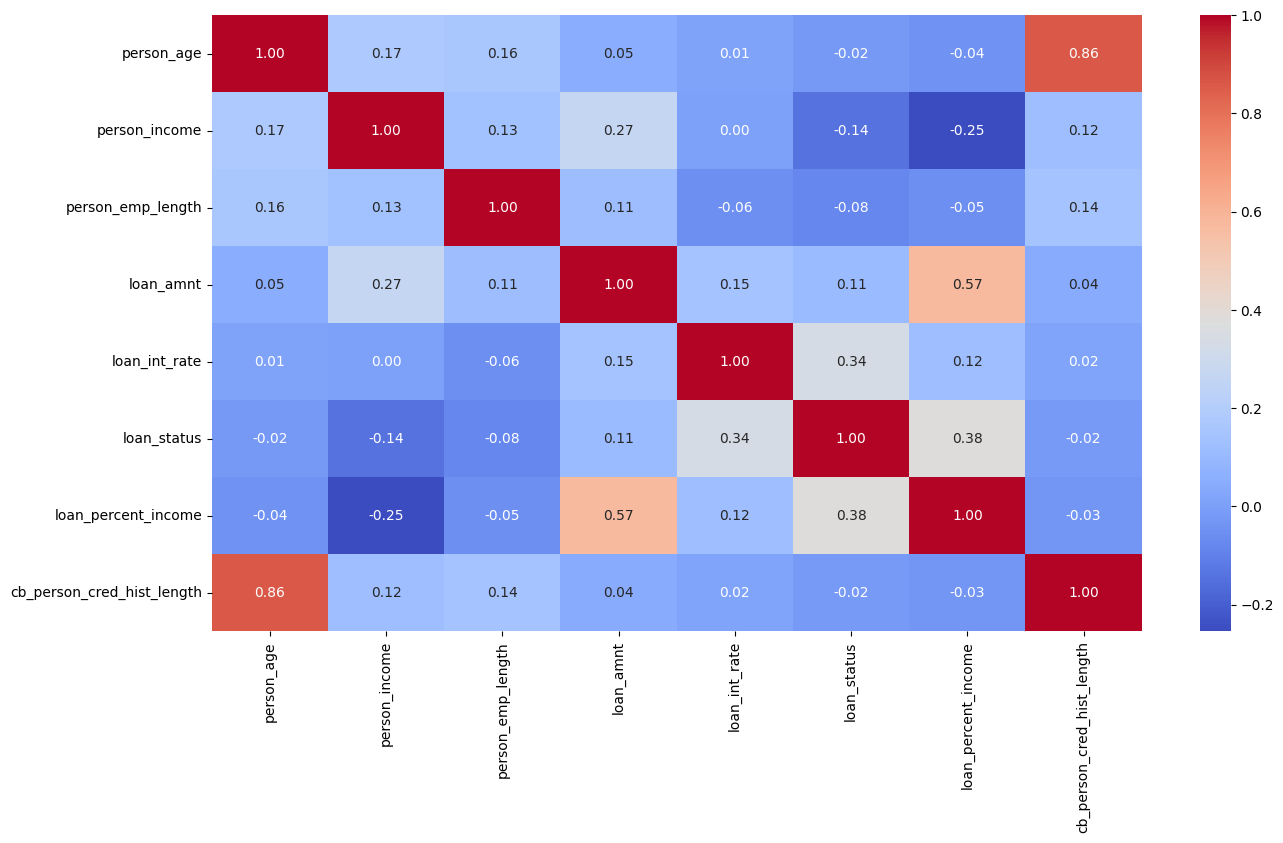

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(nums.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Insight

In [69]:
data1[data1['loan_status']==1].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [77]:
import numpy as np

a = data1[data1['loan_status'] == 1][['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
a['must_to_pymnt'] = np.where(a['cb_person_cred_hist_length'] == 3, 'Yes', 'No')
a.head()


,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,must_to_pymnt
0,35000,16.02,0.59,3,Yes
2,5500,12.87,0.57,3,Yes
3,35000,15.23,0.53,2,No
4,35000,14.27,0.55,4,No
5,2500,7.14,0.25,2,No


In [80]:
import numpy as np

#jumlah yang harus dibayarkann

a = data1[data1['loan_status'] == 1][['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
a['pymnt'] = np.where(a['cb_person_cred_hist_length'] == 3, a['loan_amnt']*(1+a['loan_int_rate']), a['loan_amnt'])
a.head()


,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,pymnt
0,35000,16.02,0.59,3,595700.0
2,5500,12.87,0.57,3,76285.0
3,35000,15.23,0.53,2,35000.0
4,35000,14.27,0.55,4,35000.0
5,2500,7.14,0.25,2,2500.0
